In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv')
data_cleaned = df.drop(['participant_id', 'day'], axis=1)

Correlations with PSS_score:
num_sms              0.035045
skin_conductance     0.016004
Neuroticism          0.015813
Conscientiousness    0.011215
Extraversion         0.010655
mobility_radius      0.008731
Openness             0.007923
call_duration        0.006049
accelerometer        0.004656
screen_on_time       0.004377
Agreeableness       -0.003250
sleep_time          -0.004866
wake_time           -0.004925
sleep_duration      -0.014899
PSQI_score          -0.021299
num_calls           -0.028919
mobility_distance   -0.034954
Name: PSS_score, dtype: float64


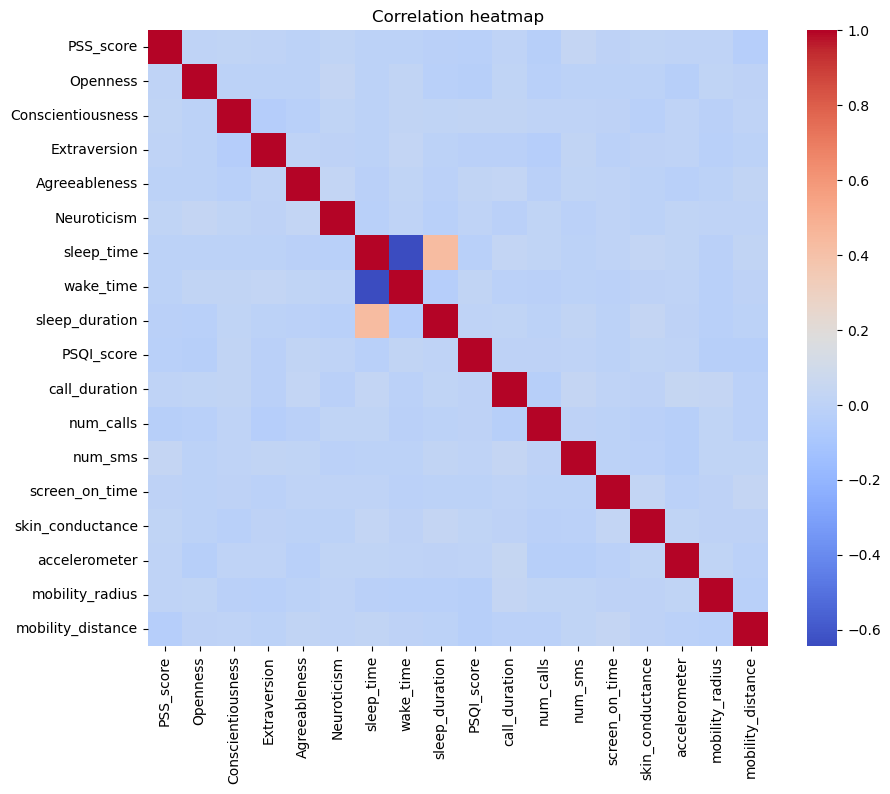

In [11]:
correlations = data_cleaned.corr()['PSS_score'].drop('PSS_score')
print("Correlations with PSS_score:")
print(correlations.sort_values(ascending=False))

# heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [17]:
X = data_cleaned.drop('PSS_score', axis=1)
y = data_cleaned['PSS_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features, but I don't think we need this
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# training a random forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

Feature importances:
skin_conductance     0.070023
Extraversion         0.068103
screen_on_time       0.066140
call_duration        0.065602
Agreeableness        0.065400
accelerometer        0.064950
wake_time            0.062760
Conscientiousness    0.062606
Openness             0.062376
Neuroticism          0.062312
mobility_distance    0.062237
sleep_time           0.062228
mobility_radius      0.061255
sleep_duration       0.059543
num_sms              0.048660
num_calls            0.039455
PSQI_score           0.016349
dtype: float64


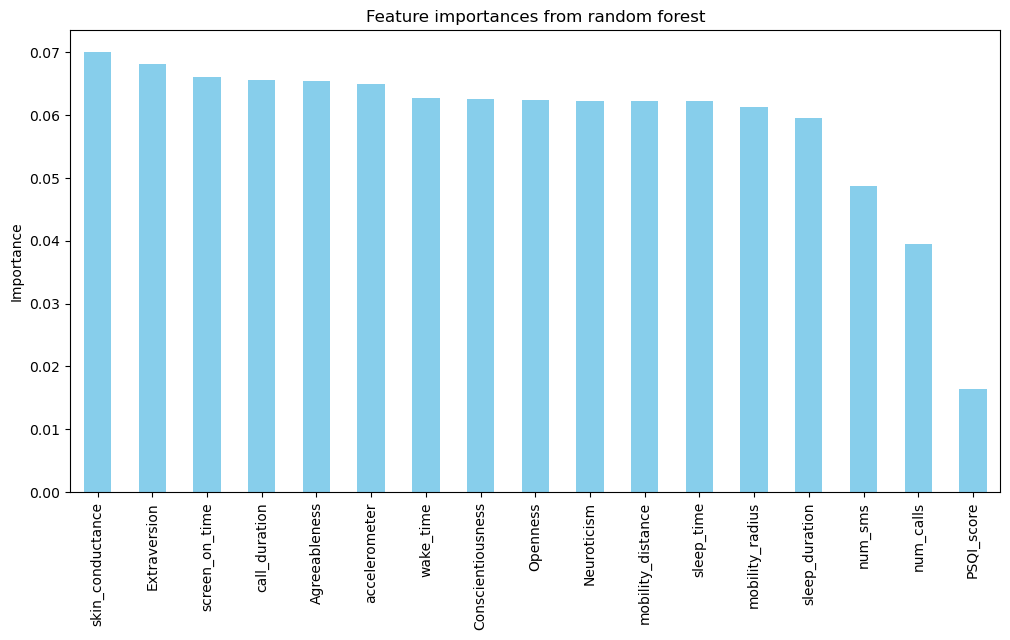

In [19]:
# feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importances:")
print(feature_importances)

plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature importances from random forest')
plt.ylabel('Importance')
plt.show()